**Curso de Inteligencia Artificial y Aprendizaje Profundo**


# Mapas Auto-organizados (SOM)

##  Autores

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 
3. Oleg Jarma, ojarmam@unal.edu.co
4. Maria del Pilar Montenegro, pmontenegro88@gmail.com

## Referencias

1. Teuvo Kohonen, *Self-Organizing Maps*, Third edition, Springer, 2000.
2. Erkki Oja and Samuel Kaski editors, *Kohonen Maps*, Elsevier, 
3. Christopher Bishop, *Pattern Recognition and Machine learning*, Springer, 2006.

## Contenido

- [Instalar Minisom](#Instalar-Minisom)
- [Introducción](#Introducción)
- [Mapas cerebrales](#Mapas-cerebrales)
- [Areas del cerebro](#Areas-del-cerebro)
- [Mapa somatotópico](#Mapa-somatotópico)
- [Cuantización vectorial](#Cuantización-vectorial])
- [Algoritmo K-means](#Algoritmo-K-means)
- [Teselación de Voronoi](#Teselación-de-Voronoi)
- [Algortimo SOM algorithm. Versión secuencial](#Algortimo-SOM-algorithm.-Versión-secuencial)
- [Algortimo SOM algorithm. Versión lote](#Algortimo-SOM-algorithm.-Versión-lote)
- [Ejemplos](#Ejemplos)

## Instalar Minisom

## Introducción

<figure>
<center>
<img src="../Imagenes/teuvo-kohonen-960.jpg" width="600" height="500" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Teuvo Kohenen</p>
</figcaption>
</figure>

Fuente: 

## Mapas cerebrales

Las diversas áreas del cerebro, especialmente de la corteza cerebral, están organizadas de acuerdo con diferentes modalidades sensoriales:

1. Tareas especializadas: control del habla.
2. Señales sensoriales (visuales, auditivas, somatosensoriales).
3. ...

Entre las áreas sensoriales primarias (10% del área cortical) hay áreas sociativas, en las que convergen señales de diferentes modalidades.

$\leadsto$ Es posible distinguir **tres tipos de mapas**:

1. Característica habilidades específicas, cuya ubicación espacial no se correlaciona con ningún valor de característica.
2. Proyección anatómica de alguna superficie receptora sobre. Por ejemplo: cortezas somáticas visuales.
3. Mapas ordenados de alguna característica abstracta, para la cual no existe una superficie de repetición. Por ejemplo, el color en el área visual.

$\leadsto$ Las principales estructuras de las redes cerebrales están determinadas genéticamente. Sin embargo, las proyecciones sensoriales se ven afectadas por la experiencia. Por ejemplo, después de la ablación de órganos sensoriales o tejidos cerebrales o la privación sensorial a una edad temprana, algunas proyecciones no se desarrollan.

## Areas del cerebro

<figure>
<center>
<img src="../Imagenes/Brain_areas.png" width="600" height="400" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Areas del cerebro</p>
</figcaption>
</figure>

Fuente: 

## Mapa somatotópico

<figure>
<center>
<img src="../Imagenes/somatotopic_map.png" width="300" height="200" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Mapa somatotópico</p>
</figcaption>
</figure>

Fuente: 

## Aprendizaje competitivo

Un orden topográfico o anatómico puro de las conexiones neuronales podría explicarse fácilmente como sigue.

*Los axones de las células neurales, cuando crecen hacia sus destinos, pueden ser mantenidos separados por las estructuras celulares, y el destino se encuentra siguiendo la acción de los marcadores químicos.

Sin embargo, existe algo de confusión, porque estas conexiones no siempre son una a una, debido a que también existe en las estaciones de procesamiento de las rutas de transmisión de señal (núcleos) en las que se mezclan las señales. Por ejemplo, en la corteza auditiva existe el mapa tonotópico de frecuencia acústica de tonos percibidos*.

$\leadsto$ Para concluir: en el cerebro existe un **orden espacial y una organización** significativa de las funciones cerebrales.

Estos hechos clave fueron los cimientos que Kohonen utilizó para imaginar sus mapas autoorganizados.

## Mapa tonotópico

<figure>
<center>
<img src="../Imagenes//tonotopic_map.png" width="400" height="400" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Mapa tonototópico</p>
</figcaption>
</figure>

Fuente: 

A continuación se introducen los conceptos clave usado en la construcción de un SOM.

## Cuantización vectorial

*Vector Quantization (VQ)*

VQ es un método clásico de aproximación de señales para formar una aproximación cuantificada de la distribución de los vectores de datos de entrada. $x \in \mathfrak {R}^n $, usando un número finito de los llamados *libros de códigos de vectores (code books)*  $m_i \in \mathfrak {R} ^n, \quad i = 1,2, \ldots, k $ . 

Una vez que se elige  el **libro de códigos**, la aproximación de $x$ significa encontrar el vector del libro de códigos $m_c$ más cercano a $x$ (en el espacio de entrada), generalmente usando  la métrica euclidiana:

$$
||x -m_c|| = \underset{i}{min} \{ ||x -m_i|| \}, \text{ or }
$$

$$
c =  \underset{i}{arg min} \{ ||x -m_i|| \}.
$$

$\leadsto$ Realmente, no es necesario utilizar la métrica euclidiana. Si existe una matriz de índices de similitud para medir la similitud entre los elementos de la muestra, el algoritmo puede usar esta medida de similitud para calcular la aproximación.

## Algoritmo K-means

Un algoritmo general que se puede utilizar para calcular un libro de códigos a partir de una muestra es el algoritmo **k-means**. Este es un algoritmo de tipo experanza-maximización (EM).

Supongamos que tenemos un conjunto de datos $ X = \{x_1, \ldots, x_N; \quad x_i \in \mathfrak {R} ^ n \} $. 

El objetivo es dividir el conjunto de datos en un número de clústeres de $K$, para un valor de $ K $ dado.

Intuitivamente, esperamos que cada grupo contenga un grupo de puntos  cuyas distancias entre puntos sean pequeñas en comparación con las distancias a puntos fuera del grupo.

Introducimos los vectores de libro de códigos $ m_k,  k = 1, \ldots, K $, que están asociados con el grupo $ k $-th. Para cada punto  $ x_n $ introducimos un conjunto correspondiente de variables binarias $ r_{nk} \in \{0,1 \} $, donde $ k = 1, \ldots, K $, la indica a cuál de los $ K $ clústeres  está asignado el punto $ x_n $.

La función de destino se define como

$$
J = \sum_{n=1}^{N}\sum_{k=1}^{K} r_{nk}||x_n-m_k||^2.
$$

### El algoritmo

1. Escoger aleatoriamente algunos valores $m_k$.
2. **Paso E**. Para cada  $x_n$ sea $r_{nk}=1$, tal que $k =  \underset{i}{arg min} \{ ||x -m_i||$, and $r_{nl}=0$ para $l\ne k$.
3. **Paso M**. La función objetivo $J$ es cuadrática, así que solamente tiene un mínimo. El extremo se puede obtener directamente minimizando $J$ para obtener

$$
m_k = \frac{\sum_n r_{nk}x_n}{\sum_n r_{nk}}.
$$

Los pasos 2 y 3 se repiten hasta convergencia.

## Teselación de Voronoi

La siguiente figura ejemplifica un espacio bidimensional donde un número finito de libro de códigos o * vectores de referencia * se muestra como puntos, correspondientes a sus coordenadas. Este espacio está dividido en regiones, delimitado por líneas (en general hiperplanos) de modo que cada partición contiene un vector de referencia que es el * vecino más cercano * a cualquier vector dentro de la misma partición. Estas líneas constituyen la teselación de Voronoi.

<figure>
<center>
<img src="../Imagenes/Voronoi_tessellation.png" width="400" height="400" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Teselación de Voronoi</p>
</figcaption>
</figure>

Fuente: 

### Conjunto de Voronoi

Se dice que todos los vectores $ x $ que tienen un vector de referencia particular como su vecino más cercano en la partición correspondiente de la teselación de Voronoi constituyen el conjunto de Voronoi.

## Algortimo SOM algorithm. Versión secuencial

Consideramos un SOM con cuadrícula rectangular bidimensional de $ K $ prototipos $ w_j \in \mathfrak {R}^p $ (también se pueden usar otras opciones, como cuadrículas hexagonales).

Cada uno de los prototipos de $ K $ está parametrizado con respecto a un par de coordenadas enteras 

$\mathcal{l}_j \in  
\mathfrak{M} =\mathfrak{M}_1 \times  \mathfrak{M}_2$. Here $\mathfrak{M}_1=\{1,2,\ldots,m_1 \}$ y similarmente se define $\mathfrak{M}_2$.

El algortimo secuencial es como sigue.

1. Inicializar los pesos de las neuronas $W =\{w_1,w_2,\ldots,w_K\}$ con puntos aleatorios de la distribución de entrada representada por el conjunto de datos $X$. 

2. Obtenga una muestra $x$ de $X$ y seleccione la mejor unidad correspondiente (*bmu*) $b(x)$ usando la ecuación

$$
b(x) = \underset{i}{arg min} \{ ||x -w_i||\}
$$

3. En el tiempo $t+1$ actualice (mueva) el *bmu* y su vencidad hacia $x$ para reforzar ligeramente la respuesta de los mapas al patrón. La regla de actualización se puede escribir de la siguiente manera

$$
\begin{align}
\Delta_{w_i}^{(t)} &= \gamma^{(t)} \cdot h(b(x),i)\cdot(x-w_i^{(t)}),\\
w_i^{(t+1)} &=  w_i^{(t)} + \Delta_{w_i}^{(t)}.
\end{align}
$$

4. Actualice la vecindad inmediata de esa neurona de acuerdo con la siguiente trama.

5. Repita los pasos 2, 3 y 4 siguiendo un programa de enfriamiento predeterminado tanto para la tasa de aprendizaje como para el radio del vecindario.


<figure>
<center>
<img src="../Imagenes/som_neighborhood.png"" width="400" height="400" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Vecindad en un SOM. Vecindarios (Nc) para una matriz rectangular de unidades de clúster: Nc = 0 entre rectángulos negros, Nc = 1 en rojo y Nc = 2 en azul.</p>
</figcaption>
</figure>

Fuente: 

### Notas

1. $\gamma^{(𝑡)}$: es el factor de la tasa de aprendizaje que puede ser lineal, exponencial o inversamente
proporcional. Es una función del tiempo monótonamente decreciente. $(t)$. Por ejemplo $\gamma^{(t)} = 1/t$.
2. $h(b(x),i)$  se denota en ocasiones $H(x,i)$.  La función $H(x,i)$ captura la interacción  entre las vecindades del  *bmu* $b(x)$ y la unidad $i$, que está siendo actualizada. Típicas escogencias  para la función de vecindad  son  una gaussiana:

$$
h(i,j) = \exp\left[\frac{d_M^2(i,j)}{2\sigma^2} \right].
$$

en donde $d_M$ es la distnacia entre los puntos $i$ and $j$ y el espacio $\mathfrak{M}$. 


Otra función de vecindad es la llamada función burbuja:

$$
h(i,j) = \begin{cases} 1 & d_m(i,j)\le c\\
                       0 & d_m(i,j)>c
         \end{cases}
$$ 

## Algortimo SOM algorithm. Versión lote

En la versión batch, los prototipos  $m_j$ son actualizados vía


$$
m_j = \frac{\sum_n r_{nj}x_n}{\sum_n r_{nj}}.
$$

en donde los pesos $r_{nj}$  pueden sumar 1, o decrecer de acuerdo con las distancias al mapa.

### Vecindades para teselaciones de Voronoi rectagulares 

La imagen muestra cómo el vecindario cambia (disminuye) en el tiempo.


Las siguientes dos figuras ilustran el proceso teóricos de proyección.

<figure>
<center>
<img src="../Imagenes/som_structure.png" width="600" height="500" align="center"/>
</center>
<figcaption>
<p style="text-align:center">  Estructura de construcción del mapa autoorganizado</p>
</figcaption>
</figure>

Fuente: 

<figure>
<center>
<img src="../Imagenes/latent_space_som.png"" width="600" height="500" align="center"/>
</center>
<figcaption>
<p style="text-align:center"> Estructura latente representada por el  mapa autoorganizado</p>
</figcaption>
</figure>

Fuente: 


## Ejemplos 

### Datos simulados

<figure>
<center>
<img src="../Imagenes/simulation_to_SOM.png" width="400" height="300" align="center"/>
</center>
<figcaption>
<p style="text-align:center"> Ejemplo de datos simulados</p>
</figcaption>
</figure>

Fuente: Hastie et al. [The elements of the Statistical Learning](https://web.stanford.edu/~hastie/Papers/ESLII.pdf), Standford, 2008.

<figure>
<center>
<img src="../Imagenes/SOM_to_Simulate_data.png" width="600" height="500" align="center"/>
</center>
<figcaption>
<p style="text-align:center"> Mapas autoorganizado de los datos simulados. A  la izquierda la configuración inicial. A la derecha la configuración final.</p>
</figcaption>
</figure>


Fuente: Hastie et al. [The elements of the Statistical Learning](https://web.stanford.edu/~hastie/Papers/ESLII.pdf), Standford, 2008.

### UN primer ejemplo histórico. Gráfico de la pobreza


<figure>
<center>
<img src="../Imagenes/poverty.png" width="600" height="500" align="center"/>
</center>
<figcaption>
<p style="text-align:center"> Ejemplo histórico. Mapa de la probreza</p>
</figcaption>
</figure>


Fuente: Kohonen. [Poverty map](http://www.cis.hut.fi/research/som-research/worldmap.html), 1997.

### Códigos con Minisom

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom 


Ahora generamos y visualizamos algunos conjuntos de datos con Minisom.


MiniSom implementa os dos tipos de entrenamiento presentados arriba. 

1. El entrenamiento secuencial, implementado por el método *train_random*, donde el modelo se entrena seleccionando muestras aleatorias de sus datos.
2. El entrenamiento por lotes, implementado por el método *train_batch*, donde las muestras se seleccionan en el orden en que se almacenan.

Los pesos de la red se inicializan aleatoriamente de forma predeterminada. 

Se proporcionan dos métodos adicionales para inicializar los pesos de una manera basada en datos: *random_weights_init* y *pca_weights_init*.

Para obtener una descripción general de todas las funciones implementadas en minisom, puede examinar los siguientes ejemplos en Github: 
https://github.com/JustGlowing/minisom/tree/master/examples



In [18]:
import sys
sys.path.insert(0, '../')

In [2]:
from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline

%load_ext autoreload

En lo que sigue, el error de cuantización (quatization error)es el error de reconstrucción y es dado por

$$
q_err = \frac{1}{N} \sum ||x-w_j||^2
$$,

en donde la suma es sobre los $x$'s y en donde $w_j$ es el correspondiente prototipo de $x$.

### Dígitos a mano alzada

Eso son son los datos de MNIST. Probablemente es un subconjunto.

In [34]:
import sys
sys.path.insert(0, '../')

from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
%autoreload 2
from sklearn import datasets
from sklearn.preprocessing import scale

# load the digits dataset from scikit-learn
digits = datasets.load_digits(n_class=10)
data = digits.data  # matrix where each row is a vector that represent a digit.
data = scale(data)
num = digits.target  # num[i] is the digit represented by data[i]

In [32]:
digits.data.shape

(1797, 64)

In [15]:
%autoreload 2
from sklearn import datasets
from sklearn.preprocessing import scale

# load the digits dataset from scikit-learn
digits = datasets.load_digits(n_class=10)
data = digits.data  # matrix where each row is a vector that represent a digit.
data = scale(data)
num = digits.target  # num[i] is the digit represented by data[i]

In [36]:
som = MiniSom(30, 30, 64, sigma=4,
              learning_rate=0.5, neighborhood_function='triangle')
som.pca_weights_init(data)
print("Training...")
som.train_random(data, 5000, verbose=False)  # random training
print("\n...ready!")

Training...

...ready!


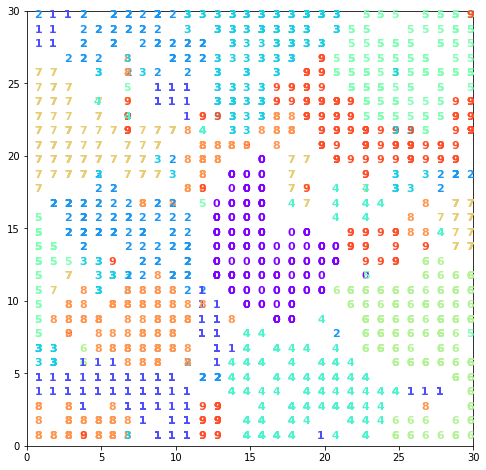

In [38]:
plt.figure(figsize=(8, 8))
wmap = {}
im = 0
for x, t in zip(data, num):  # scatterplot
    w = som.winner(x)
    wmap[w] = im
    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.savefig('../Imagenes/som_digts.png')
plt.show()

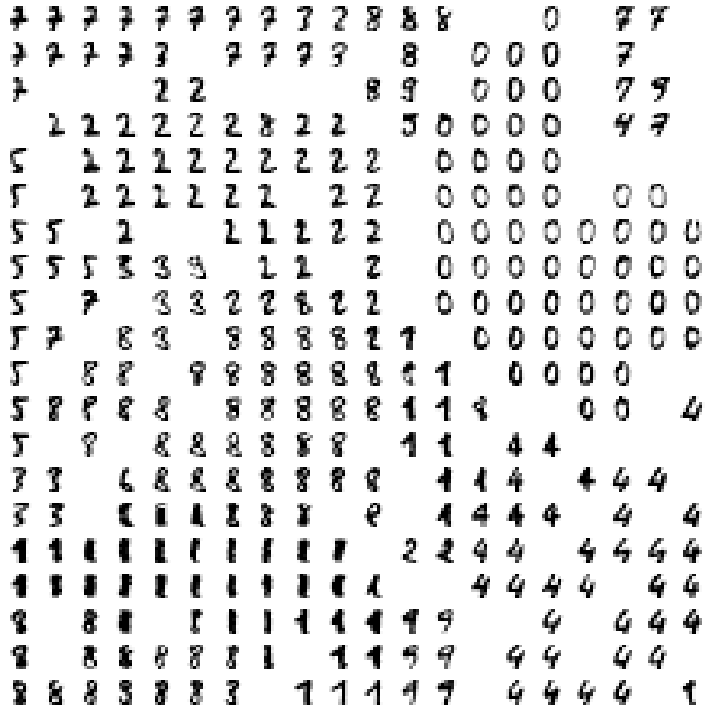

In [39]:
plt.figure(figsize=(10, 10), facecolor='white')
cnt = 0
for j in reversed(range(20)):  # images mosaic
    for i in range(20):
        plt.subplot(20, 20, cnt+1, frameon=False,  xticks=[],  yticks=[])
        if (i, j) in wmap:
            plt.imshow(digits.images[wmap[(i, j)]],
                       cmap='Greys', interpolation='nearest')
        else:
            plt.imshow(np.zeros((8, 8)),  cmap='Greys')
        cnt = cnt + 1

plt.tight_layout()
plt.savefig('../Imagenes/som_digts_imgs.png')
plt.show()

### Indice de democracia

In [19]:
import sys
sys.path.insert(0, '../')
%load_ext autoreload

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
%matplotlib inline

from minisom import MiniSom
from sklearn.preprocessing import minmax_scale, scale
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
# download from wikipedia and reorganization
 # pre-downloaded file
democracy_index = pd.read_csv('../Datos/democracy_index.csv')

In [21]:
democracy_index.head()

Unnamed: 0 rank      country  democracy_index  \
0           0    1       Norway             9.87   
1           1    2      Iceland             9.58   
2           2    3       Sweden             9.39   
3           3    4  New Zealand             9.26   
4           4    5      Denmark             9.22   

   electoral_processand_pluralism  functioning_of_government  \
0                           10.00                       9.64   
1                           10.00                       9.29   
2                            9.58                       9.64   
3                           10.00                       9.29   
4                           10.00                       9.29   

   political_participation  political_culture  civil_liberties        category  
0                    10.00              10.00             9.71  Full democracy  
1                     8.89              10.00             9.71  Full democracy  
2                     8.33              10.00             9.41  Full democracy  
3                     8.89               8.13            10.00  Full democracy  
4                     8.33               9.38             9.12  Full democracy

In [22]:
category_color = {'Full democracy': 'darkgreen',
                  'Flawed democracy': 'limegreen',
                  'Hybrid regime': 'darkorange',
                  'Authoritarian': 'crimson'}
colors_dict = {c: category_color[dm] for c, dm in zip(democracy_index.country,
                                                      democracy_index.category)}

In [23]:
country_codes = {'Afghanistan': 'AF',
 'Albania': 'AL',
 'Algeria': 'DZ',
 'Angola': 'AO',
 'Argentina': 'AR',
 'Armenia': 'AM',
 'Australia': 'AU',
 'Austria': 'AT',
 'Azerbaijan': 'AZ',
 'Bahrain': 'BH',
 'Bangladesh': 'BD',
 'Belarus': 'BY',
 'Belgium': 'BE',
 'Benin': 'BJ',
 'Bhutan': 'BT',
 'Bolivia': 'BO',
 'Bosnia and Herzegovina': 'BA',
 'Botswana': 'BW',
 'Brazil': 'BR',
 'Bulgaria': 'BG',
 'Burkina Faso': 'BF',
 'Burundi': 'BI',
 'Cambodia': 'KH',
 'Cameroon': 'CM',
 'Canada': 'CA',
 'Cape Verde': 'CV',
 'Central African Republic': 'CF',
 'Chad': 'TD',
 'Chile': 'CL',
 'China': 'CN',
 'Colombia': 'CO',
 'Comoros': 'KM',
 'Costa Rica': 'CR',
 'Croatia': 'HR',
 'Cuba': 'CU',
 'Cyprus': 'CY',
 'Czech Republic': 'CZ',
 'Democratic Republic of the Congo': 'CD',
 'Denmark': 'DK',
 'Djibouti': 'DJ',
 'Dominican Republic': 'DO',
 'Ecuador': 'EC',
 'Egypt': 'EG',
 'El Salvador': 'SV',
 'Equatorial Guinea': 'GQ',
 'Eritrea': 'ER',
 'Estonia': 'EE',
 'Ethiopia': 'ET',
 'Fiji': 'FJ',
 'Finland': 'FI',
 'France': 'FR',
 'Gabon': 'GA',
 'Gambia': 'GM',
 'Georgia': 'GE',
 'Germany': 'DE',
 'Ghana': 'GH',
 'Greece': 'GR',
 'Guatemala': 'GT',
 'Guinea': 'GN',
 'Guinea-Bissau': 'GW',
 'Guyana': 'GY',
 'Haiti': 'HT',
 'Honduras': 'HN',
 'Hong Kong': 'HK',
 'Hungary': 'HU',
 'Iceland': 'IS',
 'India': 'IN',
 'Indonesia': 'ID',
 'Iran': 'IR',
 'Iraq': 'IQ',
 'Ireland': 'IE',
 'Israel': 'IL',
 'Italy': 'IT',
 'Ivory Coast': 'IC',
 'Jamaica': 'JM',
 'Japan': 'JP',
 'Jordan': 'JO',
 'Kazakhstan': 'KZ',
 'Kenya': 'KE',
 'Kuwait': 'KW',
 'Kyrgyzstan': 'KG',
 'Laos': 'LA',
 'Latvia': 'LV',
 'Lebanon': 'LB',
 'Lesotho': 'LS',
 'Liberia': 'LR',
 'Libya': 'LY',
 'Lithuania': 'LT',
 'Luxembourg': 'LU',
 'Macedonia': 'MK',
 'Madagascar': 'MG',
 'Malawi': 'MW',
 'Malaysia': 'MY',
 'Mali': 'ML',
 'Malta': 'MT',
 'Mauritania': 'MR',
 'Mauritius': 'MU',
 'Mexico': 'MX',
 'Moldova': 'MD',
 'Mongolia': 'MN',
 'Montenegro': 'ME',
 'Morocco': 'MA',
 'Mozambique': 'MZ',
 'Myanmar': 'MM',
 'Namibia': 'NA',
 'Nepal': 'NP',
 'Netherlands': 'NL',
 'New Zealand': 'NZ',
 'North Macedonia': 'NM',
 'Nicaragua': 'NI',
 'Niger': 'NE',
 'Nigeria': 'NG',
 'North Korea': 'KP',
 'Norway': 'NO',
 'Oman': 'OM',
 'Pakistan': 'PK',
 'Palestine': 'PS',
 'Panama': 'PA',
 'Papua New Guinea': 'PG',
 'Paraguay': 'PY',
 'Peru': 'PE',
 'Philippines': 'PH',
 'Poland': 'PL',
 'Portugal': 'PT',
 'Qatar': 'QA',
 'Republic of China (Taiwan)': 'TW',
 'Republic of the Congo': 'CG',
 'Romania': 'RO',
 'Russia': 'RU',
 'Rwanda': 'RW',
 'Saudi Arabia': 'SA',
 'Senegal': 'SN',
 'Serbia': 'RS',
 'Sierra Leone': 'SL',
 'Singapore': 'SG',
 'Slovakia': 'SK',
 'Slovenia': 'SI',
 'South Africa': 'ZA',
 'South Korea': 'KR',
 'Spain': 'ES',
 'Sri Lanka': 'LK',
 'Sudan': 'SD',
 'Suriname': 'SR',
 'Swaziland': 'SZ',
 'Sweden': 'SE',
 'Switzerland': 'CH',
 'Syria': 'SY',
 'Tajikistan': 'TJ',
 'Tanzania': 'TZ',
 'Thailand': 'TH',
 'Timor-Leste': 'TL',
 'Togo': 'TG',
 'Trinidad and Tobago': 'TT',
 'Tunisia': 'TN',
 'Turkey': 'TR',
 'Turkmenistan': 'TM',
 'Uganda': 'UG',
 'Ukraine': 'UA',
 'United Arab Emirates': 'AE',
 'United Kingdom': 'GB',
 'United States': 'US',
 'Uruguay': 'UY',
 'Uzbekistan': 'UZ',
 'Venezuela': 'VE',
 'Vietnam': 'VN',
 'Yemen': 'YE',
 'Zambia': 'ZM',
 'Zimbabwe': 'ZW'}

In [24]:
feature_names = ['democracy_index', 'electoral_processand_pluralism', 'functioning_of_government',
                 'political_participation', 'political_culture', 'civil_liberties']

X = democracy_index[feature_names].values
X = scale(X)

size = 15
som = MiniSom(size, size, len(X[0]),
              neighborhood_function='gaussian', sigma=1.5,
              random_seed=1)

som.pca_weights_init(X)
som.train_random(X, 1000, verbose=False)

Map of countries
----

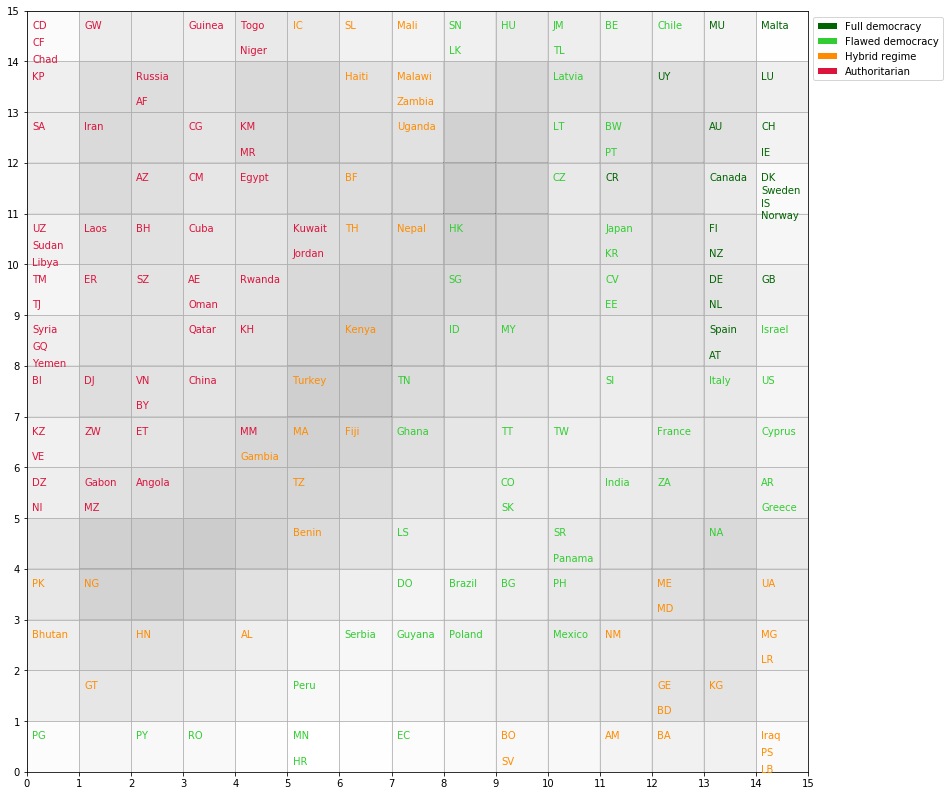

In [25]:
def shorten_country(c):
    if len(c) > 6:
        return country_codes[c]
    else:
        return c

country_map = som.labels_map(X, democracy_index.country)
    
plt.figure(figsize=(14, 14))
for p, countries in country_map.items():
    countries = list(countries)
    x = p[0] + .1
    y = p[1] - .3
    for i, c in enumerate(countries):
        off_set = (i+1)/len(countries) - 0.05
        plt.text(x, y+off_set, shorten_country(c), color=colors_dict[c], fontsize=10)
plt.pcolor(som.distance_map().T, cmap='gray_r', alpha=.2)
plt.xticks(np.arange(size+1))
plt.yticks(np.arange(size+1))
plt.grid()

legend_elements = [Patch(facecolor=clr,
                         edgecolor='w',
                         label=l) for l, clr in category_color.items()]
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, .95))
plt.show()

#### Planos de características

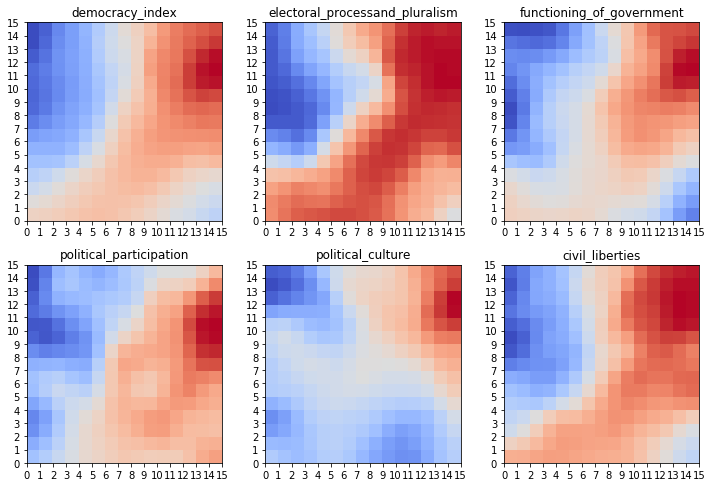

In [26]:
W = som.get_weights()
plt.figure(figsize=(10, 10))
for i, f in enumerate(feature_names):
    plt.subplot(3, 3, i+1)
    plt.title(f)
    plt.pcolor(W[:,:,i].T, cmap='coolwarm')
    plt.xticks(np.arange(size+1))
    plt.yticks(np.arange(size+1))
plt.tight_layout()
plt.show()

#### Plano de Caracterísrtcas más importantes


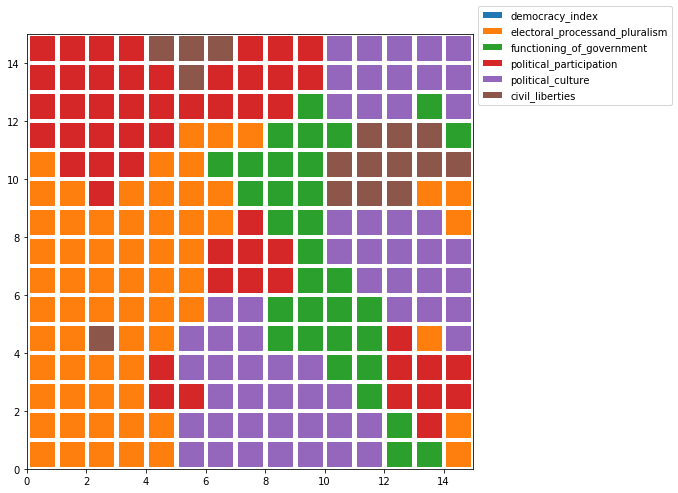

In [27]:
Z = np.zeros((size, size))
plt.figure(figsize=(8, 8))
for i in np.arange(som._weights.shape[0]):
    for j in np.arange(som._weights.shape[1]):
        feature = np.argmax(W[i, j , :])
        plt.plot([j+.5], [i+.5], 'o', color='C'+str(feature),
                 marker='s', markersize=24)

legend_elements = [Patch(facecolor='C'+str(i),
                         edgecolor='w',
                         label=f) for i, f in enumerate(feature_names)]

plt.legend(handles=legend_elements,
           loc='center left',
           bbox_to_anchor=(1, .95))
        
plt.xlim([0, size])
plt.ylim([0, size])
plt.show()